In [1]:
import pandas as pd
import numpy as np
from wine_acquire import wrangle_wine, split_data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Aquire

In [2]:
wine = wrangle_wine()

In [3]:
wine

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_color
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,0
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,0
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,0
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1


# Prepare

In [4]:
quality_bin = []
for row in wine.quality:
    if row <= 5:
        quality_bin.append('low')
    elif row == 6:
        quality_bin.append('mid')
    else:
        quality_bin.append('high')
wine['quality_bin'] = quality_bin

In [136]:
wine.quality_bin.value_counts()

quality_bin
mid     2835
low     2383
high    1277
Name: count, dtype: int64

# Train Validate Test

In [5]:
train, validate, test = split_data(wine)

In [6]:
train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_color,quality_bin
2671,5.9,0.30,0.30,2.0,0.030,38.0,142.0,0.98892,3.41,0.41,12.9,7,0,high
4444,5.0,0.35,0.25,7.8,0.031,24.0,116.0,0.99241,3.39,0.40,11.3,6,0,mid
3604,7.4,0.36,0.23,1.9,0.017,31.0,69.0,0.98920,2.93,0.36,12.5,6,0,mid
2623,6.5,0.18,0.41,14.2,0.039,47.0,129.0,0.99678,3.28,0.72,10.3,7,0,high
1549,8.5,0.15,0.49,1.5,0.031,17.0,122.0,0.99320,3.03,0.40,10.3,6,0,mid


In [7]:
train.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'wine_color', 'quality_bin'],
      dtype='object')

# X/ Y train

In [8]:
x_train = train.drop(columns=['quality', 'quality_bin'])
y_train = train.drop(columns = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'wine_color'])

# Scaler

In [9]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)

In [10]:
train.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'wine_color', 'quality_bin'],
      dtype='object')

In [11]:
x_train = pd.DataFrame(x_train, columns = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'wine_color']).reset_index()

In [12]:
y_train = pd.DataFrame(y_train).reset_index()

In [13]:
train_scaled = pd.concat([x_train, y_train], axis=1)

In [14]:
train_scaled = train_scaled.drop(columns='index')

In [15]:
train_scaled['quality_bin'] = train_scaled['quality_bin'].map({'low':0, 'mid':1, 'high':2})

In [16]:
train_scaled.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,wine_color,quality,quality_bin
fixed_acidity,1.000000,0.211634,0.330649,-0.128035,0.293998,-0.271824,-0.314398,0.446214,-0.252640,0.310737,-0.084436,0.478392,-0.069711,-0.067072
volatile_acidity,0.211634,1.000000,-0.390583,-0.213330,0.384112,-0.352783,-0.425713,0.256741,0.283168,0.234166,-0.026714,0.661024,-0.246330,-0.246090
citric_acid,0.330649,-0.390583,1.000000,0.146128,0.035559,0.135849,0.205406,0.105441,-0.333025,0.049098,-0.027398,-0.198476,0.055514,0.052215
residual_sugar,-0.128035,-0.213330,0.146128,1.000000,-0.142692,0.420374,0.504384,0.544305,-0.261960,-0.198502,-0.377224,-0.357203,-0.043652,-0.063735
chlorides,0.293998,0.384112,0.035559,-0.142692,1.000000,-0.199992,-0.293359,0.371656,0.067690,0.384857,-0.254699,0.531045,-0.201719,-0.204673
free_sulfur_dioxide,-0.271824,-0.352783,0.135849,0.420374,-0.199992,1.000000,0.711356,0.048482,-0.149740,-0.179912,-0.193783,-0.463981,0.047835,0.023467
total_sulfur_dioxide,-0.314398,-0.425713,0.205406,0.504384,-0.293359,0.711356,1.000000,0.049551,-0.237304,-0.264605,-0.279152,-0.699040,-0.055353,-0.069985
density,0.446214,0.256741,0.105441,0.544305,0.371656,0.048482,0.049551,1.000000,0.023757,0.257178,-0.704385,0.392863,-0.307800,-0.330298
pH,-0.252640,0.283168,-0.333025,-0.261960,0.067690,-0.149740,-0.237304,0.023757,1.000000,0.196842,0.118445,0.345808,0.016567,0.021535
sulphates,0.310737,0.234166,0.049098,-0.198502,0.384857,-0.179912,-0.264605,0.257178,0.196842,1.000000,0.015332,0.493421,0.033206,0.035477


In [17]:
train_scaled

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,wine_color,quality,quality_bin
0,-1.014358,-0.232723,-0.108553,-0.742782,-0.778562,0.399995,0.445960,-1.964292,1.184573,-0.835314,2.014252,-0.563273,7,2
1,-1.725167,0.073793,-0.455607,0.494407,-0.747316,-0.386571,-0.014582,-0.771300,1.060270,-0.905199,0.672085,-0.563273,6,1
2,0.170325,0.135096,-0.594429,-0.764113,-1.184768,0.006712,-0.847098,-1.868579,-1.798708,-1.184738,1.678710,-0.563273,6,1
3,-0.540485,-0.968361,0.654965,1.859582,-0.497343,0.905644,0.215689,0.722504,0.376601,1.331118,-0.166769,-0.563273,7,2
4,1.039092,-1.152271,1.210251,-0.849437,-0.747316,-0.779853,0.091697,-0.501253,-1.177191,-0.905199,-0.166769,-0.563273,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3632,-0.461506,-0.539239,-0.108553,1.902243,-0.091137,0.512361,1.172197,1.139539,-1.239343,-0.206350,-1.173394,-0.563273,6,1
3633,-1.014358,0.196399,-1.219126,0.174444,-0.591082,0.175262,1.207624,-0.091055,-0.307067,0.702154,-0.586196,-0.563273,5,0
3634,0.249303,1.422463,-1.635590,-0.614797,1.064988,-0.948403,-1.591049,0.428529,0.500905,0.422614,-0.082884,1.775338,6,1
3635,-0.698443,-0.110117,0.030268,-0.849437,-0.559836,-1.060770,-0.723106,-1.619042,0.500905,-0.485889,1.510940,-0.563273,6,1


# Explore


Residual sugar and Density, 

Fixed acidity and Residual Sugar

Density and Fixed Acidity

Residual Sugar and Volatile Acidity
Wine_color

### Residual sugar

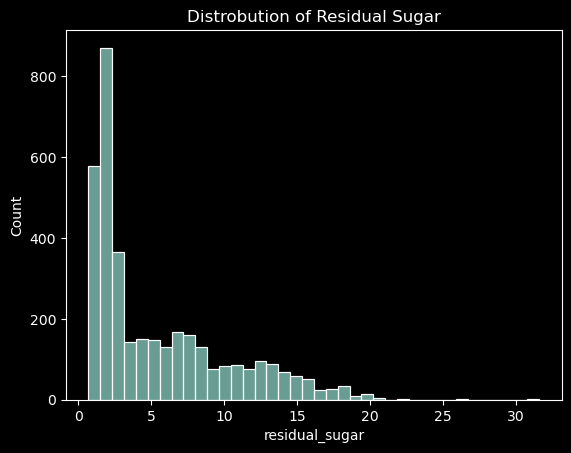

In [185]:
sns.histplot(data= train, x='residual_sugar')
plt.title('Distrobution of Residual Sugar')
plt.show()

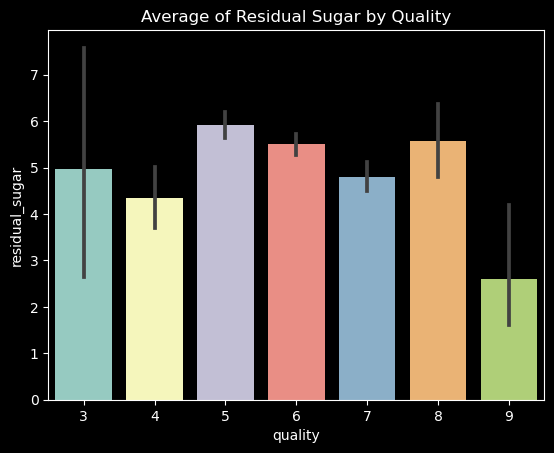

In [186]:
sns.barplot(data= train, y='residual_sugar', x='quality')
plt.title('Average of Residual Sugar by Quality')
plt.show()

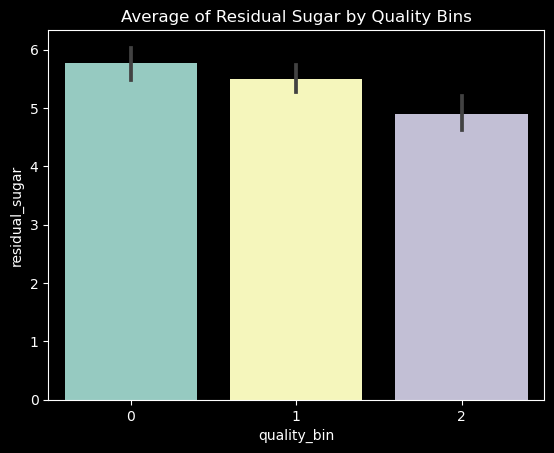

In [193]:
sns.barplot(data= train, y='residual_sugar', x='quality_bin')
plt.title('Average of Residual Sugar by Quality Bins')
plt.show()

### Alcohol

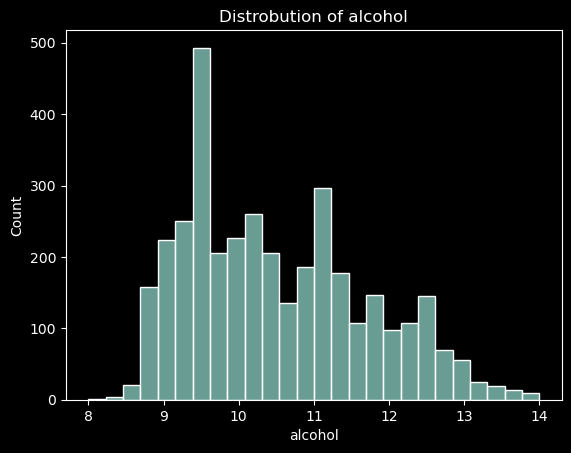

In [188]:
sns.histplot(data= train, x='alcohol')
plt.title('Distrobution of alcohol')
plt.show()

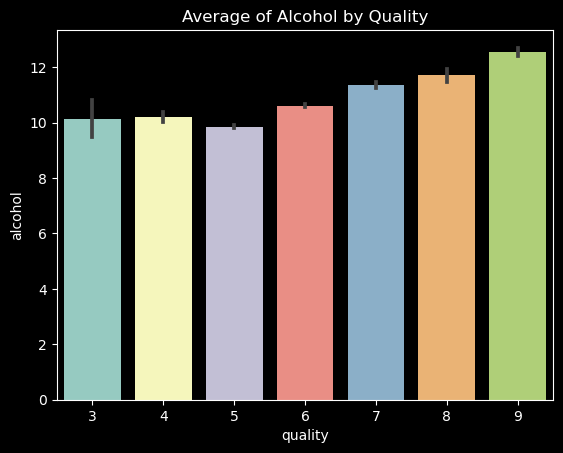

In [187]:
sns.barplot(data= train, y='alcohol', x='quality')
plt.title('Average of Alcohol by Quality')
plt.show()

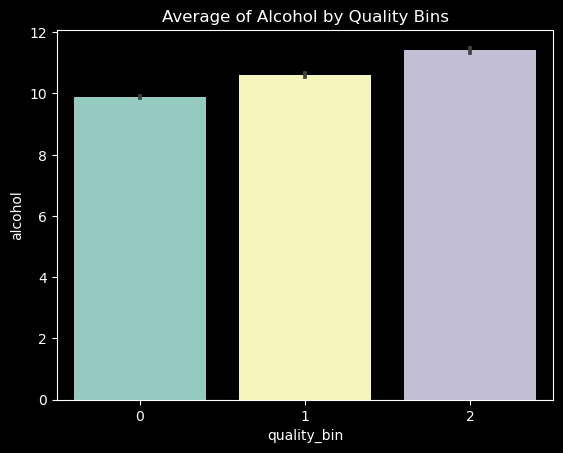

In [192]:
sns.barplot(data= train, y='alcohol', x='quality_bin')
plt.title('Average of Alcohol by Quality Bins')
plt.show()

H$_0$: Average alcohol in high quality wine (7,8,9) <= Average alcohol is low quality wine (3,4,5)

H$_α$: Average alcohol in high quality wine (7,8,9) > Average alcohol in low quality wine (3,4,5)

In [195]:
t, p = stats.ttest_ind(high_q.alcohol, low_q.alcohol, equal_var=False)
t, p

if p / 2 > α:
    print("We fail to reject the null hypothesis")
elif t < 0:
    print("We fail to reject the null hypothesis")
else:
    print("We reject the null hypothesis")

We reject the null hypothesis


### Density 

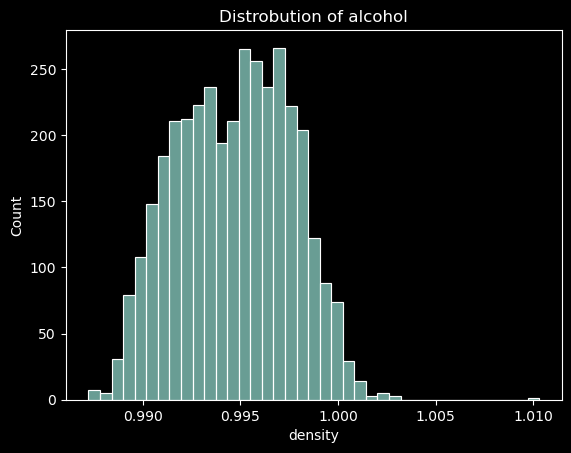

In [189]:
sns.histplot(data= train, x='density')
plt.title('Distrobution of alcohol')
plt.show()

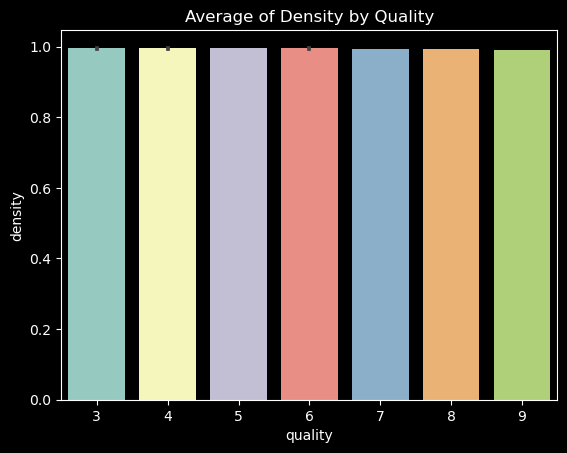

In [190]:
sns.barplot(data= train, y='density', x='quality')
plt.title('Average of Density by Quality')
plt.show()

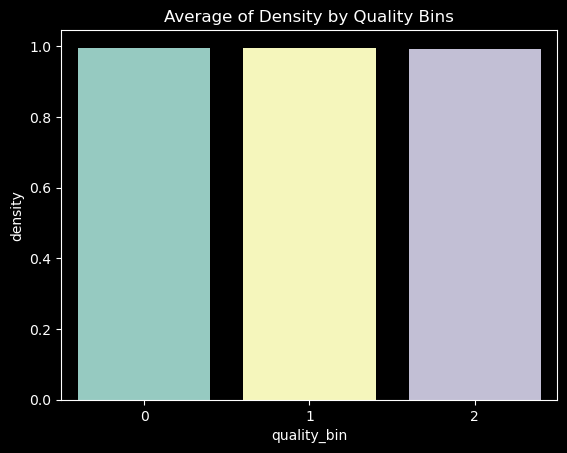

In [194]:
sns.barplot(data= train, y='density', x='quality_bin')
plt.title('Average of Density by Quality Bins')
plt.show()

H$_0$: Average Density in high quality wine (7,8,9) <= Average Density in low quality wine (3,4,5)

H$_α$: Average Density in high quality wine (7,8,9) > Average Density in low quality wine (3,4,5)

In [196]:
t, p = stats.ttest_ind(high_q.density, low_q.density, equal_var=False)
t, p

if p / 2 > α:
    print("We fail to reject the null hypothesis")
elif t < 0:
    print("We fail to reject the null hypothesis")
else:
    print("We reject the null hypothesis")

We fail to reject the null hypothesis


In [198]:
train.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_color,quality_bin,cluster
fixed_acidity,1.000000,0.211634,0.330649,-0.128035,0.293998,-0.271824,-0.314398,0.446214,-0.252640,0.310737,-0.084436,-0.069711,0.478392,-0.067072,0.048065
volatile_acidity,0.211634,1.000000,-0.390583,-0.213330,0.384112,-0.352783,-0.425713,0.256741,0.283168,0.234166,-0.026714,-0.246330,0.661024,-0.246090,-0.013805
citric_acid,0.330649,-0.390583,1.000000,0.146128,0.035559,0.135849,0.205406,0.105441,-0.333025,0.049098,-0.027398,0.055514,-0.198476,0.052215,0.049355
residual_sugar,-0.128035,-0.213330,0.146128,1.000000,-0.142692,0.420374,0.504384,0.544305,-0.261960,-0.198502,-0.377224,-0.043652,-0.357203,-0.063735,0.301292
chlorides,0.293998,0.384112,0.035559,-0.142692,1.000000,-0.199992,-0.293359,0.371656,0.067690,0.384857,-0.254699,-0.201719,0.531045,-0.204673,0.040625
free_sulfur_dioxide,-0.271824,-0.352783,0.135849,0.420374,-0.199992,1.000000,0.711356,0.048482,-0.149740,-0.179912,-0.193783,0.047835,-0.463981,0.023467,0.082344
total_sulfur_dioxide,-0.314398,-0.425713,0.205406,0.504384,-0.293359,0.711356,1.000000,0.049551,-0.237304,-0.264605,-0.279152,-0.055353,-0.699040,-0.069985,0.024220
density,0.446214,0.256741,0.105441,0.544305,0.371656,0.048482,0.049551,1.000000,0.023757,0.257178,-0.704385,-0.307800,0.392863,-0.330298,0.266222
pH,-0.252640,0.283168,-0.333025,-0.261960,0.067690,-0.149740,-0.237304,0.023757,1.000000,0.196842,0.118445,0.016567,0.345808,0.021535,-0.063445
sulphates,0.310737,0.234166,0.049098,-0.198502,0.384857,-0.179912,-0.264605,0.257178,0.196842,1.000000,0.015332,0.033206,0.493421,0.035477,0.060310


In [18]:
train['alcohol'].value_counts()

alcohol
9.500000     199
9.400000     187
9.200000     147
11.000000    139
10.000000    137
            ... 
13.566667      1
11.750000      1
10.933333      1
12.066667      1
12.250000      1
Name: count, Length: 91, dtype: int64

In [19]:
train

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_color,quality_bin
2671,5.9,0.30,0.30,2.0,0.030,38.0,142.0,0.98892,3.41,0.41,12.9,7,0,high
4444,5.0,0.35,0.25,7.8,0.031,24.0,116.0,0.99241,3.39,0.40,11.3,6,0,mid
3604,7.4,0.36,0.23,1.9,0.017,31.0,69.0,0.98920,2.93,0.36,12.5,6,0,mid
2623,6.5,0.18,0.41,14.2,0.039,47.0,129.0,0.99678,3.28,0.72,10.3,7,0,high
1549,8.5,0.15,0.49,1.5,0.031,17.0,122.0,0.99320,3.03,0.40,10.3,6,0,mid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733,6.6,0.25,0.30,14.4,0.052,40.0,183.0,0.99800,3.02,0.50,9.1,6,0,mid
693,5.9,0.37,0.14,6.3,0.036,34.0,185.0,0.99440,3.17,0.63,9.8,5,0,low
1033,7.5,0.57,0.08,2.6,0.089,14.0,27.0,0.99592,3.30,0.59,10.4,6,1,mid
3582,6.3,0.32,0.32,1.5,0.037,12.0,76.0,0.98993,3.30,0.46,12.3,6,0,mid


Best Features:
- Alcohol - 
- Free Sulfur Dioxide(SO$_2$): Antioxidating antimicrobial agent for preserving wine.
- Citric Acid: Wine additive to increase acidity at the cost of microbial instability.

Performing T-Test on training data


H$_0$: Average alcohol in high quality wine (7,8,9) <= Average alcohol is low quality wine (3,4,5)

H$_α$: Average alcohol in high quality wine (7,8,9) > Average alcohol in low quality wine (3,4,5)

H$_0$: Average Free Sulfur Dioxide (SO$_2$) in high quality wine (7,8,9) <= Average Free Sulfur Dioxide (SO$_2$) in low quality wine (3,4,5)

H$_α$: Average Free Sulfur Dioxide (SO$_2$) in high quality wine (7,8,9) > Average Free Sulfur Dioxide (SO$_2$) in low quality wine (3,4,5)

H$_0$: Average Citric Acid in high quality wine (7,8,9) <= Average Citric Acid in low quality wine (3,4,5)

H$_α$: Average Citric Acid in high quality wine (7,8,9) > Average Citric Acid in low quality wine (3,4,5)

H$_0$: Average total sulfur dioxide in high quality wine (7,8,9) <= Average total sulfur dioxide in low quality wine (3,4,5)

H$_α$: Average total sulfur dioxide in high quality wine (7,8,9) > Average total sulfur dioxide in low quality wine (3,4,5)

H$_0$: Average Density in high quality wine (7,8,9) <= Average Density in low quality wine (3,4,5)

H$_α$: Average Density in high quality wine (7,8,9) > Average Density in low quality wine (3,4,5)

In [20]:
high_q = train[(train.quality == 7) | (train.quality == 8) | (train.quality == 9)]
mid_q = train[train.quality == 6]
low_q = train[(train.quality == 3) | (train.quality == 4) | (train.quality == 5)]

In [21]:
α = 0.05

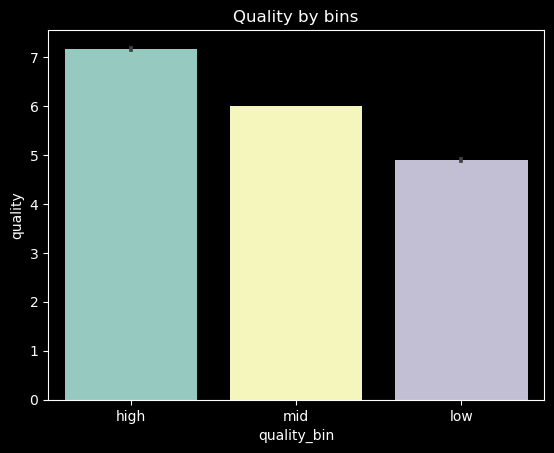

In [22]:
sns.barplot(data=train, x='quality_bin', y="quality")
plt.title('Quality by bins')

plt.show()

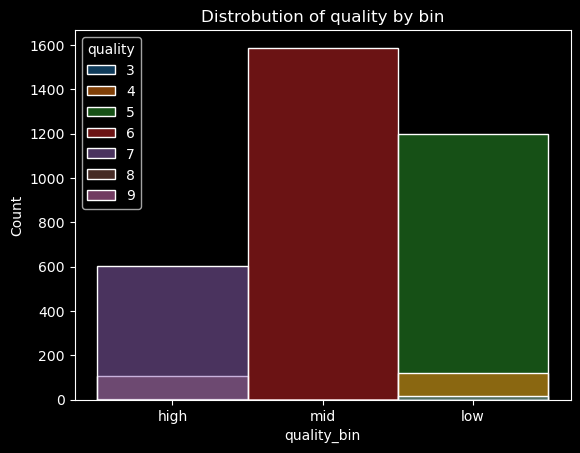

In [23]:
sns.histplot(data=train, x="quality_bin", hue="quality", palette= 'tab10')
plt.title('Distrobution of quality by bin')
plt.show()

In [24]:
print(high_q.alcohol.var())
print(low_q.alcohol.var())

1.4841831805927261
0.7529754527059171


In [25]:
t, p = stats.ttest_ind(high_q.alcohol, low_q.alcohol, equal_var=False)
t, p

(29.733530384497623, 2.0807651933674183e-143)

In [26]:
t, p = stats.ttest_ind(high_q.alcohol, low_q.alcohol, equal_var=False)
t, p

if p / 2 > α:
    print("We fail to reject the null hypothesis")
elif t < 0:
    print("We fail to reject the null hypothesis")
else:
    print("We reject the null hypothesis")

We reject the null hypothesis


### H$_0$: Average Free Sulfur Dioxide (SO$_2$) in high quality wine (7,8,9) <= Average Free Sulfur Dioxide (SO$_2$) in low quality wine (3,4,5)

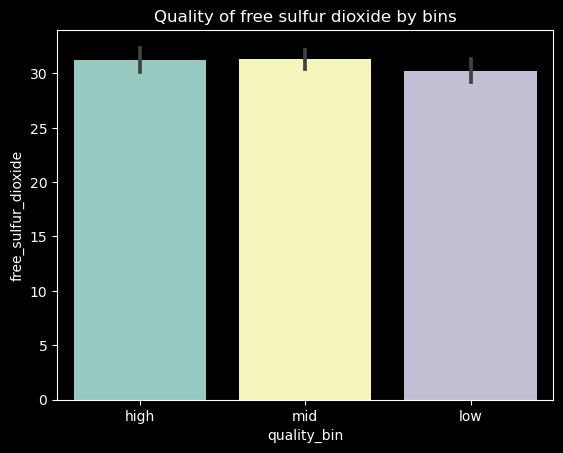

In [27]:
sns.barplot(data=train, x='quality_bin', y="free_sulfur_dioxide")
plt.title('Quality of free sulfur dioxide by bins')

plt.show()

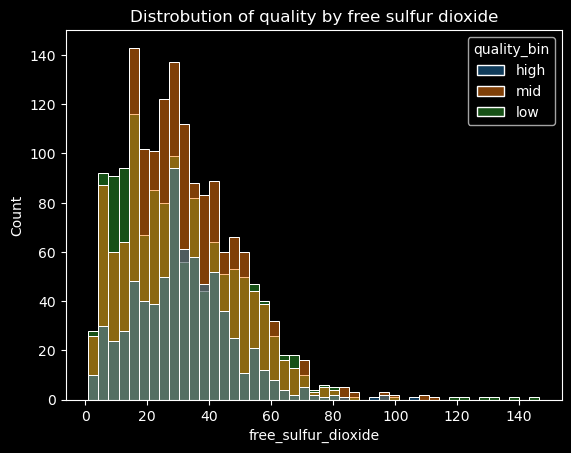

In [28]:
sns.histplot(data=train, x="free_sulfur_dioxide", hue="quality_bin", palette= 'tab10')
plt.title('Distrobution of quality by free sulfur dioxide')
plt.show()

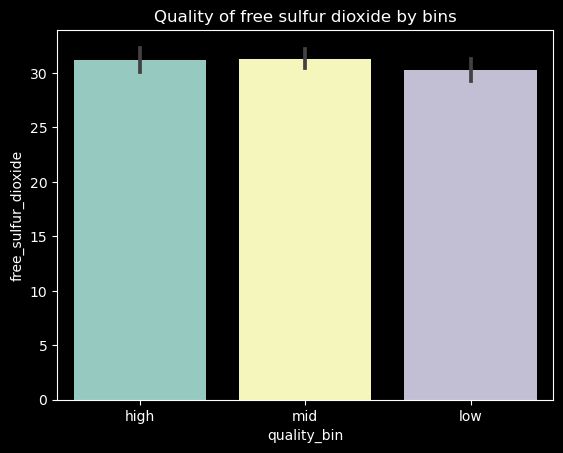

In [29]:
sns.barplot(data=train, x='quality_bin', y="free_sulfur_dioxide")
plt.title('Quality of free sulfur dioxide by bins')

plt.show()

In [30]:
print(high_q.free_sulfur_dioxide.var())
print(low_q.free_sulfur_dioxide.var())

239.52184090419362
372.2949998650337


In [31]:
t, p = stats.ttest_ind(high_q.free_sulfur_dioxide, low_q.free_sulfur_dioxide, equal_var=False)
t, p

(1.2531826685656116, 0.21030674049832482)

In [32]:
if p / 2 > α:
    print("We fail to reject the null hypothesis")
elif t < 0:
    print("We fail to reject the null hypothesis")
else:
    print("We reject the null hypothesis")

We fail to reject the null hypothesis


In [33]:
print(high_q.residual_sugar.var())
print(low_q.residual_sugar.var())

16.610018530489118
24.766635403228648


In [34]:
t, p = stats.ttest_ind(high_q.residual_sugar, low_q.residual_sugar, equal_var=True)
t, p

(-3.982521067832431, 7.057057307524727e-05)

In [35]:
if p / 2 > α:
    print("We fail to reject the null hypothesis")
elif t < 0:
    print("We fail to reject the null hypothesis")
else:
    print("We reject the null hypothesis")

We fail to reject the null hypothesis


In [36]:
print(high_q.citric_acid.var())
print(low_q.citric_acid.var())

0.011759810777457837
0.02680053137347313


In [37]:
t, p = stats.ttest_ind(high_q.citric_acid, low_q.citric_acid, equal_var=False)
t, p

(3.496899704305543, 0.00048119086301206035)

In [38]:
if p / 2 > α:
    print("We fail to reject the null hypothesis")
elif t < 0:
    print("We fail to reject the null hypothesis")
else:
    print("We reject the null hypothesis")

We reject the null hypothesis


In [39]:
print(high_q.total_sulfur_dioxide.var())
print(low_q.total_sulfur_dioxide.var())

2121.292915907622
3745.155435738612


In [40]:
t, p = stats.ttest_ind(high_q.total_sulfur_dioxide, low_q.total_sulfur_dioxide, equal_var=False)
t, p

(-4.426939302693649, 1.0122561160170986e-05)

In [41]:
if p / 2 > α:
    print("We fail to reject the null hypothesis")
elif t < 0:
    print("We fail to reject the null hypothesis")
else:
    print("We reject the null hypothesis")

We fail to reject the null hypothesis


In [42]:
print(high_q.density.var())
print(low_q.density.var())

8.760926133866126e-06
6.247308860268878e-06


In [43]:
t, p = stats.ttest_ind(high_q.density, low_q.density, equal_var=False)
t, p

(-20.615532689369665, 1.209526454933893e-81)

In [44]:
t, p = stats.ttest_ind(high_q.density, low_q.density, equal_var=False)
t, p

if p / 2 > α:
    print("We fail to reject the null hypothesis")
elif t < 0:
    print("We fail to reject the null hypothesis")
else:
    print("We reject the null hypothesis")

We fail to reject the null hypothesis


In [45]:
train['quality_bin'] = train['quality_bin'].map({'high':2, 'mid':1, 'low':0})
train.sample(5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_color,quality_bin
4788,6.4,0.31,0.31,12.9,0.045,55.0,161.0,0.99546,3.02,0.59,10.2,5,0,0
2241,7.1,0.28,0.19,7.8,0.040,48.0,184.0,0.99579,3.16,0.50,9.4,5,0,0
3434,8.2,0.34,0.29,5.2,0.076,19.0,92.0,0.99138,2.95,0.39,12.5,6,0,1
698,7.5,0.31,0.51,14.8,0.039,62.0,204.0,0.99820,3.06,0.60,9.5,5,0,0
1293,6.9,0.39,0.22,4.3,0.030,10.0,102.0,0.99300,3.00,0.87,11.6,4,0,0


# Clusters

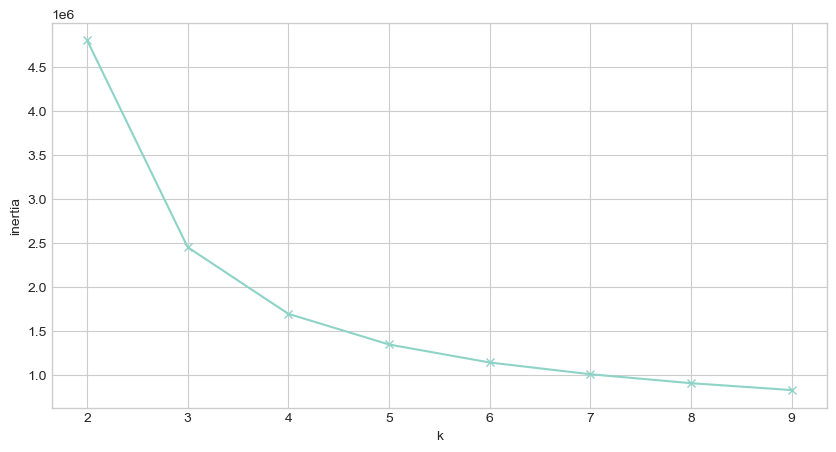

In [46]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(10,5))
    pd.Series({k: KMeans(k).fit(train).inertia_ for k in range(2, 10)}).plot(marker='x')
    plt.xticks(range(2, 10))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.show()

In [48]:
validate['quality_bin'] = validate['quality_bin'].map({'high':2, 'mid':1, 'low':0})
test['quality_bin'] = test['quality_bin'].map({'high':2, 'mid':1, 'low':0})

In [123]:
X = train[['alcohol', 'residual_sugar', 'density']]
X_val = validate[['alcohol', 'residual_sugar', 'density']]
X_test = test[['alcohol', 'residual_sugar', 'density']]


km = KMeans(n_clusters=3)
km.fit(X)

train['cluster'] = km.predict(X)
validate['cluster'] = km.predict(X_val)
test['cluster'] = km.predict(X_test)


# Features

In [172]:
X_train1 = train.drop(columns=['fixed_acidity', 'volatile_acidity', 'citric_acid',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide',
       'pH', 'sulphates', 'quality', 'wine_color', 'quality_bin', 'cluster'])
y_train1 = train.quality_bin

X_validate1 = validate.drop(columns=['fixed_acidity', 'volatile_acidity', 'citric_acid',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide',
       'pH', 'sulphates', 'quality', 'wine_color', 'quality_bin', 'cluster'])
y_validate1 = validate.quality_bin

X_test1 = test.drop(columns=['fixed_acidity', 'volatile_acidity', 'citric_acid',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide',
       'pH', 'sulphates', 'quality', 'wine_color', 'quality_bin', 'cluster'])
y_test1 = test.quality_bin

In [199]:
X_train2 = train.drop(columns=['fixed_acidity', 'volatile_acidity', 'citric_acid',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide',
       'pH', 'sulphates', 'quality', 'wine_color', 'quality_bin'])
y_train2 = train.quality_bin

X_validate2 = validate.drop(columns=['fixed_acidity', 'volatile_acidity', 'citric_acid',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide',
       'pH', 'sulphates', 'quality', 'wine_color', 'quality_bin'])
y_validate2 = validate.quality_bin

X_test2 = test.drop(columns=['fixed_acidity', 'volatile_acidity', 'citric_acid',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide',
       'pH', 'sulphates', 'quality', 'wine_color', 'quality_bin'])
y_test2 = test.quality_bin

# Baseline

In [ ]:
baseline_accuracy = (train['quality_bin'].value_counts().idxmax() == train.quality_bin).mean()

baseline_accuracy

## Decision Tree Before cluster

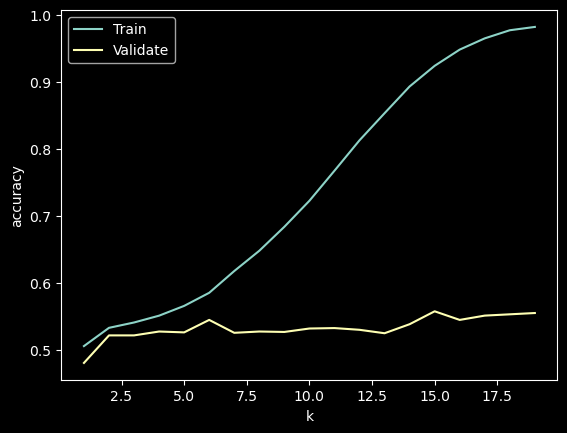

In [173]:
k_range = range(1,20)
train_score = []
validate_score = []
for k in k_range:
    clf = DecisionTreeClassifier(max_depth=k, random_state=117)
    clf.fit(X_train1, y_train1)
    train_score.append(clf.score(X_train1, y_train1))
    validate_score.append(clf.score(X_validate1, y_validate1))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(k_range, train_score, label = 'Train')
plt.plot(k_range, validate_score, label = 'Validate')
plt.legend()
plt.show()

In [174]:
clf = DecisionTreeClassifier(max_depth=6, random_state=117)
clf.fit(X_train1, y_train1)
dt_tr_acc = clf.score(X_train1, y_train1)
dt_val_acc = clf.score(X_validate1, y_validate1)

In [176]:
print(f'Ideal Decision Tree Accuracy Scores:\n\n\
Training Accuracy:\n{dt_tr_acc:2%}\n\n\
Validation Accuracy:\n{dt_val_acc:2%}\n\n\
Baseline Accuracy:\n{baseline_accuracy:2%}')

Ideal Decision Tree Accuracy Scores:

Training Accuracy:
58.564751%

Validation Accuracy:
54.522130%

Baseline Accuracy:
43.662359%


## Decision Tree after cluster

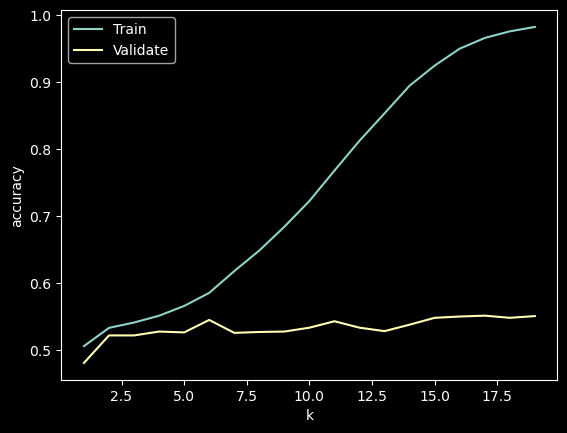

In [200]:
k_range = range(1,20)
train_score = []
validate_score = []
for k in k_range:
    clf = DecisionTreeClassifier(max_depth=k, random_state=117)
    clf.fit(X_train2, y_train2)
    train_score.append(clf.score(X_train2, y_train2))
    validate_score.append(clf.score(X_validate2, y_validate2))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(k_range, train_score, label = 'Train')
plt.plot(k_range, validate_score, label = 'Validate')
plt.legend()
plt.show()

In [201]:
clf = DecisionTreeClassifier(max_depth=6, random_state=117)
clf.fit(X_train2, y_train2)
dt_tr_acc = clf.score(X_train2, y_train2)
dt_val_acc = clf.score(X_validate2, y_validate2)

In [202]:
print(f'Ideal Decision Tree Accuracy Scores:\n\n\
Training Accuracy:\n{dt_tr_acc:2%}\n\n\
Validation Accuracy:\n{dt_val_acc:2%}\n\n\
Baseline Accuracy:\n{baseline_accuracy:2%}')

Ideal Decision Tree Accuracy Scores:

Training Accuracy:
58.564751%

Validation Accuracy:
54.522130%

Baseline Accuracy:
43.662359%


## Random Forest before cluster

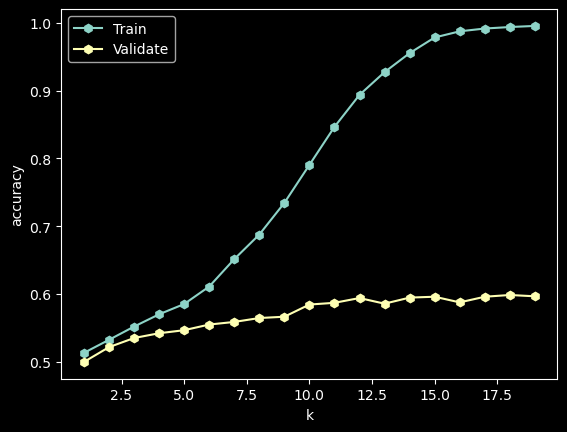

In [177]:
k_range = range(1,20)
train_score = []
validate_score = []
for k in k_range:
    rf = RandomForestClassifier(max_depth = k, random_state=117)
    rf.fit(X_train1, y_train1)
    train_score.append(rf.score(X_train1, y_train1))
    validate_score.append(rf.score(X_validate1, y_validate1))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(k_range, train_score, label = 'Train', marker='h')
plt.plot(k_range, validate_score, label = 'Validate', marker='h')
plt.legend()
plt.show()

In [178]:
rf = KNeighborsClassifier(n_neighbors=6)
rf.fit(X_train1, y_train1)
rf_tr_acc = rf.score(X_train1,y_train1)
rf_val_acc = rf.score(X_validate1, y_validate1)

In [179]:
print(f'Ideal Random Forest Accuracy Scores:\n\n\
Training Accuracy:\n{rf_tr_acc:2%}\n\n\
Validation Accuracy:\n{rf_val_acc:2%}\n\n\
Baseline Accuracy:\n{baseline_accuracy:2%}')

Ideal Random Forest Accuracy Scores:

Training Accuracy:
66.373385%

Validation Accuracy:
53.303400%

Baseline Accuracy:
43.662359%


## Random Forest after cluster

In [205]:
rf = KNeighborsClassifier(n_neighbors=6)
rf.fit(X_train2, y_train2)
rf_tr_acc = rf.score(X_train2,y_train2)
rf_val_acc = rf.score(X_validate2, y_validate2)

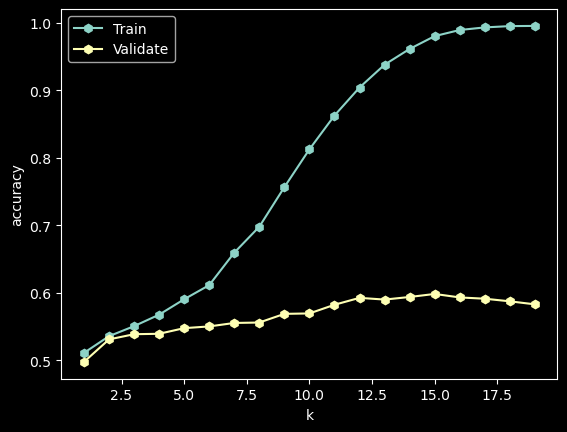

In [203]:
k_range = range(1,20)
train_score = []
validate_score = []
for k in k_range:
    rf = RandomForestClassifier(max_depth = k, random_state=117)
    rf.fit(X_train2, y_train2)
    train_score.append(rf.score(X_train2, y_train2))
    validate_score.append(rf.score(X_validate2, y_validate2))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(k_range, train_score, label = 'Train', marker='h')
plt.plot(k_range, validate_score, label = 'Validate', marker='h')
plt.legend()
plt.show()

In [206]:
print(f'Ideal Random Forest Accuracy Scores:\n\n\
Training Accuracy:\n{rf_tr_acc:2%}\n\n\
Validation Accuracy:\n{rf_val_acc:2%}\n\n\
Baseline Accuracy:\n{baseline_accuracy:2%}')

Ideal Random Forest Accuracy Scores:

Training Accuracy:
66.510861%

Validation Accuracy:
53.367543%

Baseline Accuracy:
43.662359%


## KNearest Neighbor before cluster

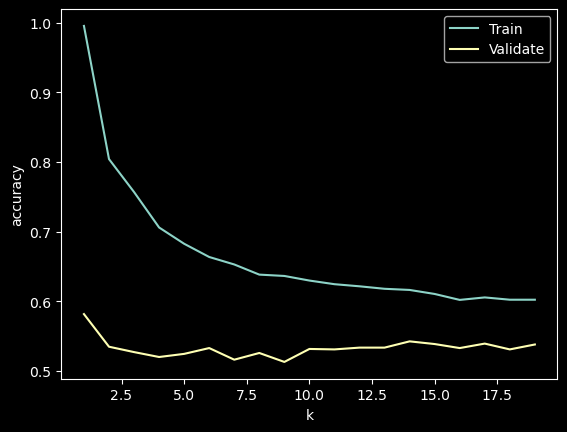

In [180]:
k_range = range(1,20)
train_score = []
validate_score = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train1, y_train1)
    train_score.append(knn.score(X_train1, y_train1))
    validate_score.append(knn.score(X_validate1, y_validate1))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(k_range, train_score, label = 'Train')
plt.plot(k_range, validate_score, label = 'Validate')
plt.legend()
plt.show()

In [181]:
knn1 = KNeighborsClassifier(n_neighbors=8)
knn1.fit(X_train1, y_train1)
knn_tr_acc = knn1.score(X_train1,y_train1)
knn_val_acc = knn1.score(X_validate1, y_validate1)

In [182]:
print(f'Ideal KNearest Neighbor Accuracy Scores:\n\n\
Training Accuracy:\n{knn_tr_acc:2%}\n\n\
Validation Accuracy:\n{knn_val_acc:2%}\n\n\
Baseline Accuracy:\n{baseline_accuracy:2%}')

Ideal KNearest Neighbor Accuracy Scores:

Training Accuracy:
63.843827%

Validation Accuracy:
52.597819%

Baseline Accuracy:
43.662359%


## KNearest Neighbor after cluster

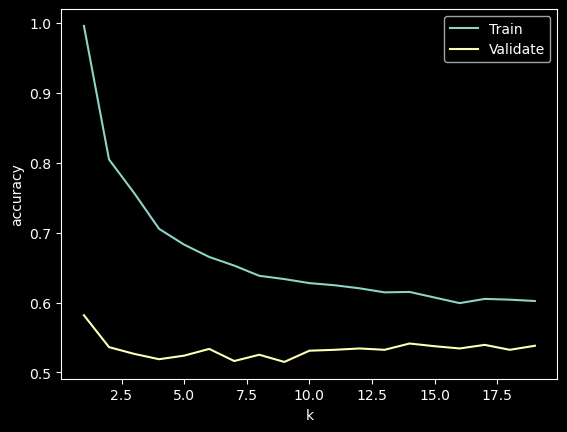

In [207]:
k_range = range(1,20)
train_score = []
validate_score = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train2, y_train2)
    train_score.append(knn.score(X_train2, y_train2))
    validate_score.append(knn.score(X_validate2, y_validate2))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(k_range, train_score, label = 'Train')
plt.plot(k_range, validate_score, label = 'Validate')
plt.legend()
plt.show()

In [208]:
knn1 = KNeighborsClassifier(n_neighbors=8)
knn1.fit(X_train2, y_train2)
knn_tr_acc = knn1.score(X_train2,y_train2)
knn_val_acc = knn1.score(X_validate2, y_validate2)

In [209]:
print(f'Ideal KNearest Neighbor Accuracy Scores:\n\n\
Training Accuracy:\n{knn_tr_acc:2%}\n\n\
Validation Accuracy:\n{knn_val_acc:2%}\n\n\
Baseline Accuracy:\n{baseline_accuracy:2%}')

Ideal KNearest Neighbor Accuracy Scores:

Training Accuracy:
63.816332%

Validation Accuracy:
52.533675%

Baseline Accuracy:
43.662359%


## Logistic Regression before and after cluster

In [210]:
X_train0 = train.drop(columns=['quality_bin', 'quality'])
y_train0 = train['quality_bin']

X_validate0 = validate.drop(columns=['quality_bin', 'quality'])
y_validate0 = validate['quality_bin']

X_test0 = test.drop(columns=['quality_bin', 'quality'])
y_test0 = test['quality_bin']
    
lr0 = LogisticRegression(random_state=117)
lr0.fit(X_train0, y_train0)
lr_tr_acc0 = lr0.score(X_train0,y_train0)

lr0.fit(X_validate0, y_validate0)
lr_val_acc0 = lr0.score(X_validate0, y_validate0)

X_train2 = train.drop(columns=['quality_bin', 'alcohol', 'citric_acid', 'quality'])
y_train2 = train['quality_bin']

X_validate2 = validate.drop(columns=['quality_bin', 'alcohol', 'citric_acid', 'quality'])
y_validate2 = validate['quality_bin']

X_test2 = test.drop(columns=['quality_bin', 'alcohol', 'citric_acid', 'quality'])
y_test2 = test['quality_bin']


lr2 = LogisticRegression()

lr2.fit(X_train2, y_train2)

lr_tr_acc2 = lr2.score(X_train2,y_train2)


lr2.fit(X_validate2, y_validate2)

lr_val_acc2 = lr2.score(X_validate2, y_validate2)



X_train3 = train.drop(columns=['quality_bin', 'alcohol', 'citric_acid', 'free_sulfur_dioxide', 'cluster', 'total_sulfur_dioxide', 'quality'])
y_train3 = train['quality_bin']

X_validate3 = validate.drop(columns=['quality_bin', 'alcohol', 'citric_acid', 'free_sulfur_dioxide', 'cluster', 'total_sulfur_dioxide', 'quality'])
y_validate3 = validate['quality_bin']

X_test3 = test.drop(columns=['quality_bin', 'alcohol', 'citric_acid', 'free_sulfur_dioxide', 'cluster', 'total_sulfur_dioxide', 'quality'])
y_test3 = test['quality_bin']


lr3 = LogisticRegression()

lr3.fit(X_train3, y_train3)

lr_tr_acc3 = lr3.score(X_train3,y_train3)


lr3.fit(X_validate3, y_validate3)

lr_val_acc3 = lr3.score(X_validate3, y_validate3)



X_train4 = train.drop(columns=['quality_bin', 'alcohol', 'citric_acid', 'free_sulfur_dioxide', 'cluster', 'total_sulfur_dioxide', 'sulphates', 'pH',
                                   'residual_sugar', 'quality'])
y_train4 = train['quality_bin']

X_validate4 = validate.drop(columns=['quality_bin', 'alcohol', 'citric_acid', 'free_sulfur_dioxide', 'cluster', 'total_sulfur_dioxide', 'sulphates', 'pH',
                                         'residual_sugar', 'quality'])
y_validate4 = validate['quality_bin']

X_test4 = test.drop(columns=['quality_bin', 'alcohol', 'citric_acid', 'free_sulfur_dioxide', 'cluster', 'total_sulfur_dioxide', 'sulphates', 'pH',
                                 'residual_sugar', 'quality'])
y_test4 = test['quality_bin']


lr4 = LogisticRegression()

lr4.fit(X_train4, y_train4)

lr_tr_acc4 = lr4.score(X_train4,y_train4)


lr4.fit(X_validate4, y_validate4)

lr_val_acc4 = lr4.score(X_validate4, y_validate4)



X_train5 = train.drop(columns=['quality_bin', 'alcohol', 'citric_acid', 'free_sulfur_dioxide', 'cluster', 'total_sulfur_dioxide', 'sulphates', 'pH',
                                   'residual_sugar', 'fixed_acidity', 'chlorides', 'volatile_acidity', 'quality'])
y_train5 = train['quality_bin']

X_validate5 = validate.drop(columns=['quality_bin', 'alcohol', 'citric_acid', 'free_sulfur_dioxide', 'cluster', 'total_sulfur_dioxide', 'sulphates', 'pH',
                                   'residual_sugar', 'fixed_acidity', 'chlorides', 'volatile_acidity', 'quality'])
y_validate5 = validate['quality_bin']

X_test5 = test.drop(columns=['quality_bin', 'alcohol', 'citric_acid', 'free_sulfur_dioxide', 'cluster', 'total_sulfur_dioxide', 'sulphates', 'pH',
                                   'residual_sugar', 'fixed_acidity', 'chlorides', 'volatile_acidity', 'quality'])
y_test5 = test['quality_bin']


lr5 = LogisticRegression()

lr5.fit(X_train5, y_train5)

lr_tr_acc5 = lr5.score(X_train5,y_train5)


lr5.fit(X_validate5, y_validate5)

lr_val_acc5 = lr5.score(X_validate5, y_validate5)





X_trainχ = train.drop(columns=['quality_bin', 'total_sulfur_dioxide', 'sulphates', 'pH',
                                   'residual_sugar', 'fixed_acidity', 'chlorides', 'volatile_acidity', 'quality', 'wine_color'])
y_trainχ = train['quality_bin']

X_validateχ = validate.drop(columns=['quality_bin', 'total_sulfur_dioxide', 'sulphates', 'pH',
                                   'residual_sugar', 'fixed_acidity', 'chlorides', 'volatile_acidity', 'quality', 'wine_color'])
y_validateχ = validate['quality_bin']

X_testχ = test.drop(columns=['quality_bin', 'total_sulfur_dioxide', 'sulphates', 'pH',
                                   'residual_sugar', 'fixed_acidity', 'chlorides', 'volatile_acidity', 'quality', 'wine_color'])
y_testχ = test['quality_bin']


lrχ = LogisticRegression()

lrχ.fit(X_trainχ, y_trainχ)

lr_tr_accχ = lrχ.score(X_trainχ,y_trainχ)


lrχ.fit(X_validateχ, y_validateχ)

lr_val_accχ = lrχ.score(X_validateχ, y_validateχ)



X_trainχx = train.drop(columns=['fixed_acidity', 'volatile_acidity', 'citric_acid',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide',
       'pH', 'sulphates', 'quality', 'wine_color', 'quality_bin'])

y_trainχx = train['quality_bin']

X_validateχx = validate.drop(columns=['fixed_acidity', 'volatile_acidity', 'citric_acid',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide',
       'pH', 'sulphates', 'quality', 'wine_color', 'quality_bin'])

y_validateχx = validate['quality_bin']

X_testχx = test.drop(columns=['fixed_acidity', 'volatile_acidity', 'citric_acid',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide',
       'pH', 'sulphates', 'quality', 'wine_color', 'quality_bin'])

y_testχx = test['quality_bin']


lrχ = LogisticRegression()

lrχ.fit(X_trainχx, y_trainχx)

lr_tr_accχx = lrχ.score(X_trainχx,y_trainχx)


lrχ.fit(X_validateχx, y_validateχx)

lr_val_accχx = lrχ.score(X_validateχx, y_validateχx)



X_trainnc = train.drop(columns=['fixed_acidity', 'volatile_acidity', 'citric_acid',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide',
       'pH', 'sulphates', 'quality', 'wine_color', 'quality_bin', 'cluster'])

y_trainnc = train['quality_bin']

X_validatenc = validate.drop(columns=['fixed_acidity', 'volatile_acidity', 'citric_acid',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide',
       'pH', 'sulphates', 'quality', 'wine_color', 'quality_bin', 'cluster'])

y_validatenc = validate['quality_bin']

X_testnc = test.drop(columns=['fixed_acidity', 'volatile_acidity', 'citric_acid',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide',
       'pH', 'sulphates', 'quality', 'wine_color', 'quality_bin', 'cluster'])

y_testnc = test['quality_bin']

lrχ = LogisticRegression()

lrχ.fit(X_trainnc, y_trainnc)

lr_tr_accnc = lrχ.score(X_trainnc,y_trainnc)


lrχ.fit(X_validatenc, y_validatenc)

lr_val_accnc = lrχ.score(X_validatenc, y_validatenc)

print(f'Logistic Regression Model Accuracy Scores:\n\n\
Baseline Accuracy Score:\n{baseline_accuracy:2%}\n\n\
Model χx Train Accuracy Score:\n{lr_tr_accχx:2%}\n\
Model χx Validate Accuracy Score:\n{lr_val_accχx:2%}\n\n\
Model nc Train Accuracy Score:\n{lr_tr_accnc:2%}\n\
Model nc Validate Accuracy Score:\n{lr_val_accnc:2%}')

Logistic Regression Model Accuracy Scores:

Baseline Accuracy Score:
43.662359%

Model χx Train Accuracy Score:
53.890569%
Model χx Validate Accuracy Score:
54.778704%

Model nc Train Accuracy Score:
53.918064%
Model nc Validate Accuracy Score:
54.393842%
